# Data Analysis Project

objectives:
1 What type of restaurant do the majority of customers order from?
2 How many votes has each type of restaurant received from customers?
3) What are the ratings that the majority of restaurants have received?
4)Zomato has observed that most couples order most of their food online. What is their
average spending on each order?
5) Which mode (online or offline) has received the maximum rating?
6) Which type of restaurant received more offline orders, so that Zomato can provide those
customers with some good offers?

# Zomato Data Analysis Using Python

In [4]:
#necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

uses of libraries:
pandas is used for data manipulation and analysis.
numpy is used for numerical operations.
matplotlib.pyplot and seaborn is used for visualization.

# creating dataframe

In [5]:
dataframe=pd.read_csv(r'Zomato data .csv')
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# converting the datatype of the 'rate' column to float and removing the denaminator

In [5]:
def handling_rate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handling_rate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# summary of dataframe

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [54]:
dataframe.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [9]:
dataframe.isnull().sum().sum()

0

# Conclusion: There is no NULL value in the dataset.

# Types of the Restaurant.

In [17]:

dataframe['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

There are four types of restaurant,we have to find which one is in majority for these we plot graph through which it is easy to understand.

Text(0.5, 0, 'Types of restaurant')

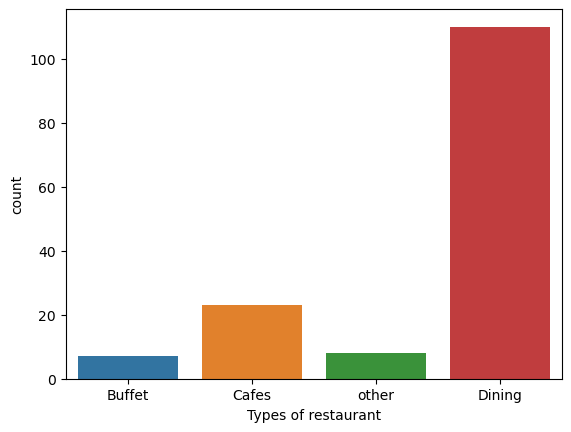

In [18]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Types of restaurant')


# Conclusion: The majority of the restaurants fall into the dining category.

# Dining restaurants are preferred by a larger number of individuals. 

In [20]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


now we have to find which type of restaurant get maximum no of votes for which we plot line plot.

Text(0, 0.5, 'votes')

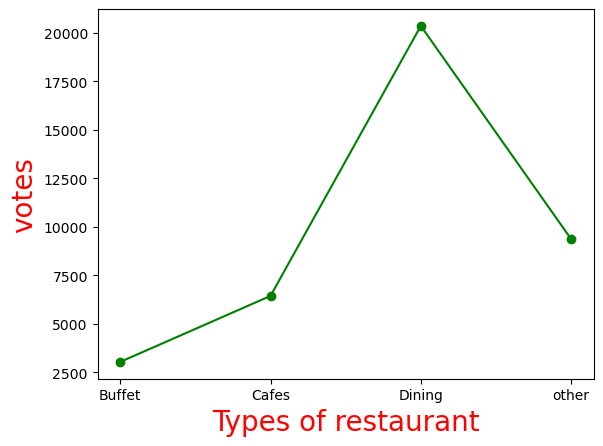

In [22]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Types of restaurant',c='red',size=20)
plt.ylabel('votes',c='red',size=20)

# Conclusion: most of the restaurant get the mojority of voting and with which max no of voting got Dining type of restaurant.

In [6]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet


from above we know the majority of restaurants get ratings,now we want to find the range of the ratings as we know here is rating out of 5 for that we plot histogram to know the exact maximum range of ratings.

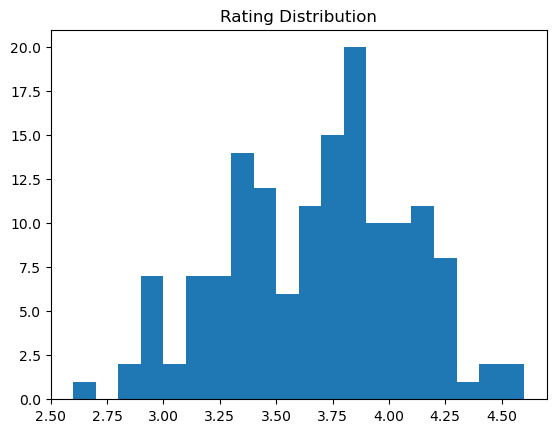

In [25]:
plt.hist(dataframe['rate'],bins=20)
plt.title('Rating Distribution')
plt.show()

# Conclusion: Here we know the majority of the rating ranging from 3.75 to 4.

now we have to find the maximum no of orders of which price are ordered,we can find the price, through which most of the orders are ordered with the help of countplot. 

In [27]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

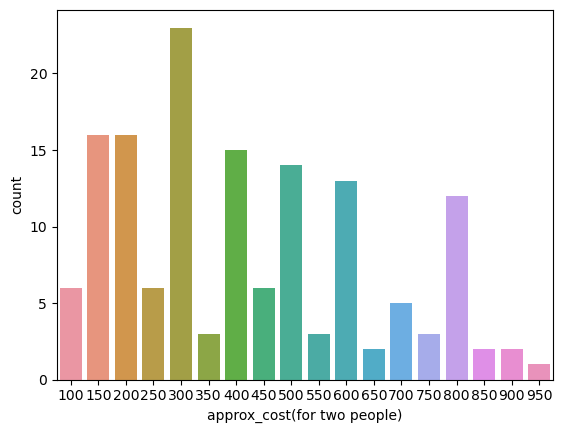

In [7]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion:The majority of couples prefer restaurants with an approximate cost of 300 rupees.


we want to check there is maximum rating given by customers for online orders or offline orders,can check using box plot. 

In [27]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

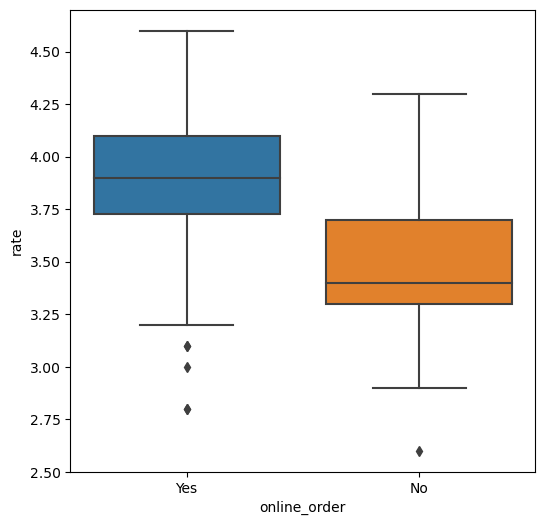

In [41]:
def handling_rate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handling_rate)
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

# Conclusion: offline orders receive lower rating in comparison with online rating which obtain excellent ratings.

if we want to check the types of the restaurant through which; which type of orders are placed like (online or offline). 
we can know customer preference that they order food online or they were like to go for eat at that perticular type of restaurants,which we can show with the help of pivot_table.  

In [42]:
dataframe.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


C:\Users\shri\AppData\Local\Temp\ipykernel_14168\3564247818.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order')


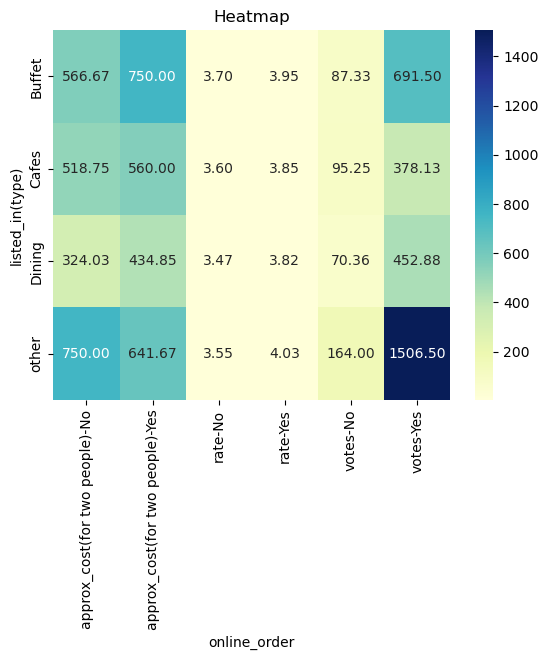

In [52]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order')
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='.2f')  # here fmt='2f'is used for float value for int value use fmt='d'
plt.title('Heatmap')
plt.xlabel('online_order')
plt.ylabel('listed_in(type)')
plt.show()

# Conclusion: Dining restaurants primarily accepts offline orders,whereas cafes primarily receive online orders. This suggests that customers prefer to place orders in person at restaurants,but prefer online ordering at cafes. 